Ta sử dụng exploratory graphs trong phân tích dữ liệu để nắm rõ các tính chất của tập dữ liệu, để tìm ra dạng mẫu (patterns) trong dữ liệu, và có cơ sở để đề xuất những mô hình dự đoán. Nhờ cách biểu diễn trực quan, ta dễ dàng nhận diện được các patterns tồn tại trong tập dữ liệu. Người ta thường có câu "một bức ảnh giá trị hơn 1000 từ". Vì bộ não của con người được cấu tạo để hiểu hình ảnh hơn là các con số khô khan.

Lưu ý, ta không dùng exploratory graphs để trình bày kết quả. Thay vì vậy, đây là bước đệm trong việc phân tích và được dùng như công cụ để phân tích nhanh tập dữ liệu. Từ đó, các nhà phân tích dữ liệu có thể hình dung được hướng đi nào có nhiều tiềm năng nhất.

Để minh hoạ điều trên, ta sẽ lấy dữ liệu từ U.S. Environmental Protection Agency (EPA). Tập dữ liệu này mô tả thông tin về mức độ ô nhiễm không khí ở các khu vực của US. Chỉ số ô nhiễm không khí cho phép (PM2.5: giá trị trung bình cộng của 3 năm trước đó) không được vượt quá 12 micro gram trên một mét khối.


In [1]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)

In [2]:
pollution <- read.csv("data/avgpm25.csv", colClasses = c("numeric", "character", "factor", "numeric", "numeric"))
head(pollution)

pm25,fips,region,longitude,latitude
9.771185,01003,east,-87.74826,30.59278
9.993817,01027,east,-85.84286,33.26581
10.688618,01033,east,-87.72596,34.73148
11.337424,01049,east,-85.79892,34.45913
12.119764,01055,east,-86.03212,34.01860
10.827805,01069,east,-85.35039,31.18973


Ta thấy có 5 cột dữ liệu. Chỉ số ô nhiễm nằm ở cột thứ nhất (pm25). Các cột còn lại gồm flips code cho biết mã khu vực (2 kí số đầu) và mã hạt (3 kí số còn lại), region (khu vực đông và tây), và kinh độ vĩ độ của khu vực này. Bây giờ, ta sẽ kiểm tra số chiều dữ liệu của pollution.


In [3]:
dim(pollution)

[1] 576   5

Có 576 dòng dữ liệu trong pollution. Ta muốn biết "có hạt nào ở US mà mức độ ô nhiễm không khí vượt quá mức cho phép của EPA hay không?". Dùng hàm summary() ta thu được số liệu sau:


In [4]:
summary(pollution$pm25)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.383   8.549  10.047   9.836  11.356  18.441 

Kết quả trên cho chúng ta một vài thông tin cơ bản về dữ liệu pm25 gồm giá trị minimum (0% quartile) và maximum (100% quartile). Trong đó, ta thấy Mean là độ đo trung bình tỉ lệ ô nhiễm ở 576 hạt. Ngoài ra, ta thấy hơn một nửa hạt có mức độ ô nhiễm dưới 10.050 (Median).


In [5]:
# lưu cột dữ liệu pm25 vào biến ppm
ppm <- pollution$pm25
quantile(ppm)

0%       25%       50%       75%      100% 
 3.382626  8.548799 10.046697 11.356012 18.440731

# boxplot

Khi sử dụng hàm quantile(), ta thu được số liệu tương tự như hàm summary(). Hàm quantile() dùng để xác định các bách phân vị của ppm. Điểm khác biệt duy nhất đó là quantile() không có giá trị mean. Bây giờ, ta thử xuất biểu đồ boxplot ra màn hình.


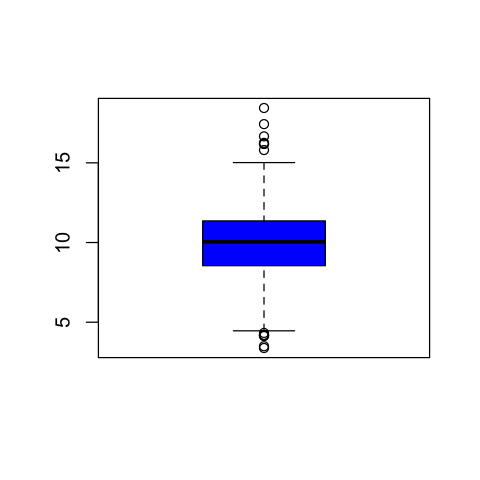

In [6]:
boxplot(ppm,col="blue")

boxplot cho ta những thông tin như hàm quantile() và summary() cung cấp. Cạnh trên cùng và dưới cùng của hình hộp màu xanh tương ứng với bách phân vị 25% và 75%. Đường thẳng kẻ ngang hình hộp màu xanh chính là giá trị median của dữ liệu ppm.

Đường thẳng kẻ dọc qua hình hộp màu xanh là biên độ được tính bằng cách lấy (75th quantile - 25 quantile) * 1.5. Biên độ này cho phép ta xác định được các giá trị ngoại lai (outliers) nếu tồn tại gía trị nào nằm ngoài biên độ này.

Một điểm hay đó là ta có thể vẽ chồng lên biểu đồ đã xuất. Nghĩa là chúng ta có thể ghi chú cho biểu đồ của mình. Ví dụ, ta kẻ một đường thẳng ngang qua giá trị 12 như sau.


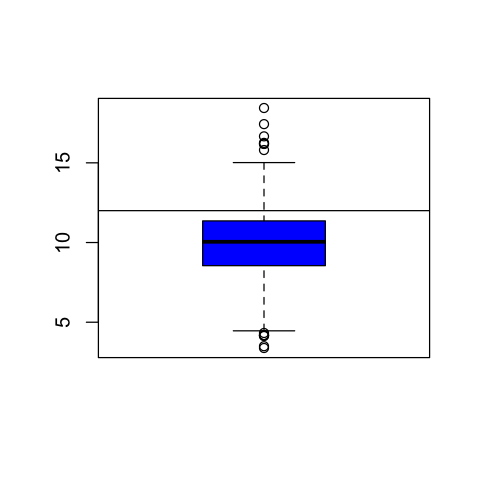

In [7]:
boxplot(ppm,col="blue")

# a, b the intercept and slope, single values.
abline(h = 12)

# histogram

Ta thấy rằng, đa số các hạt của US đều nằm dưới giá trị cho phép của EPA là 12 micrograms trên một met khối. Tiếp theo, ta sử dụng hàm hist() cho dữ liệu ppm để quan sát phân bố của dữ liệu này.


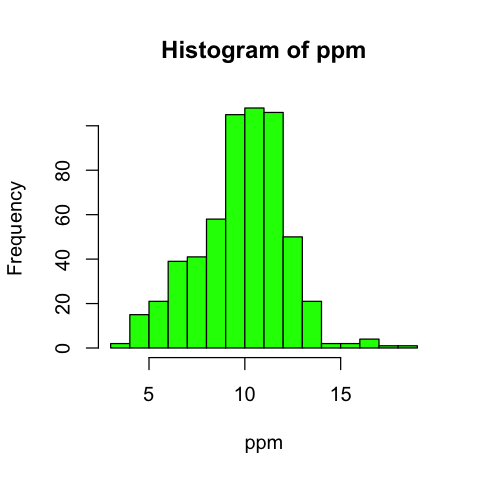

In [8]:
hist(ppm, col = "green")

Histogram cho chúng ta thêm một ít thông tin về dữ liệu đang quan sát. Ta thấy dữ liệu phân bố nhiều trong khoảng giá trị từ 9 đến 12. Bây giờ, ta dùng hàm rug với đối số là ppm.


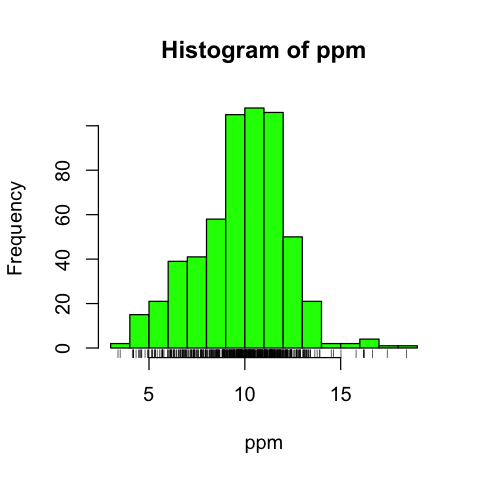

In [9]:
hist(ppm, col = "green")
rug(ppm)

Khi thêm thanh biểu đồ có dạng giống như bar code bên dưới histogram, ta có thể quan sát được có bao nhiêu điểm dữ liệu thuộc một cột histogram màu xanh lá cây này. Nó cho biết mật độ tập trung của các điểm dữ liệu phân bố trong khoảng 9 đến 12.

Ta chạy lại hàm hist() với 3 thông số, thứ nhất là dữ liệu ppm, thứ hai màu sắc 'green', cuối cùng là breaks bằng 100.


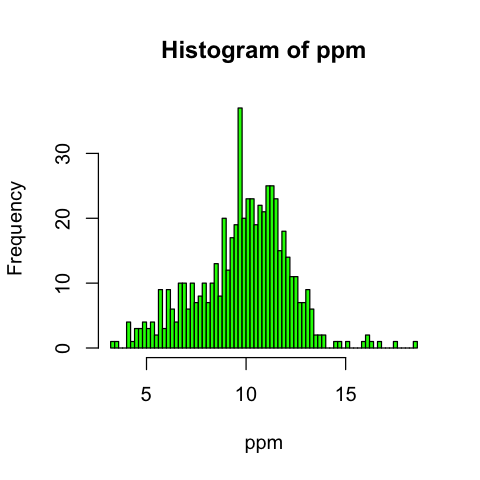

In [10]:
hist(ppm, col = "green", breaks = 100)

Thông số breaks xác định bao nhiêu cột dữ liệu chúng ta muốn histogram thể hiện. Với histogram với nhiều cột dữ liệu thế này, ta khó quan sát hơn histogram trước đó. Khi thực nghiệm, ta sẽ chọn giá trị break sao cho phù hợp để ta có thể quan sát phân bố dữ liệu rõ ràng hơn.

Ta chạy lại hàm hist với thông số màu là "green" và thêm abline qua giá trị 12 và giá trị median như sau:


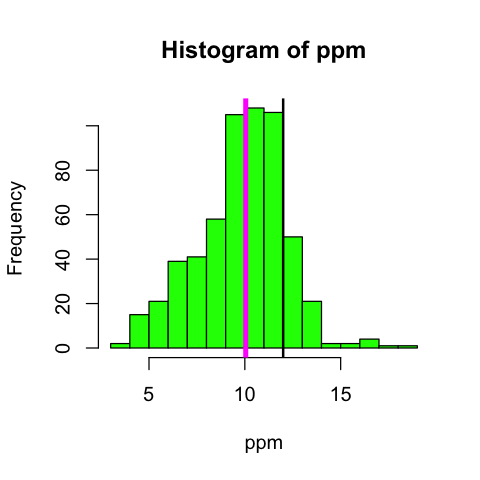

In [11]:
hist(ppm, col = "green")
# vertical line at 12, line width of 2
abline(v = 12, lwd=2)
# v equal to median(ppm),col equal to "magenta", and the lwd equal to 4.
abline(v = median(ppm), col = "magenta", lwd = 4)

Mặc dù điểm meadian (50%) nằm dưới giới hạn chuẩn, vẫn có khá nhiều các hạt ở US có mức độ ô nhiễm cao. Chúng ta có 5 cột thuộc tính. Nãy giờ ta chỉ quan sát trên cột pm25. Chúng ta có thể quan sát trên các cột thuộc tính khác như cột thuộc tính region. Ta dùng hàm table() cho cột thuộc tính này.


In [12]:
reg <- table(pollution$region)
reg


east west 
 442  134 

# barplot

Có khá nhiều hạt ở phía đông hơn phía tây. Ta dùng hàm barplot để xuất biểu đồ thông tin về region.

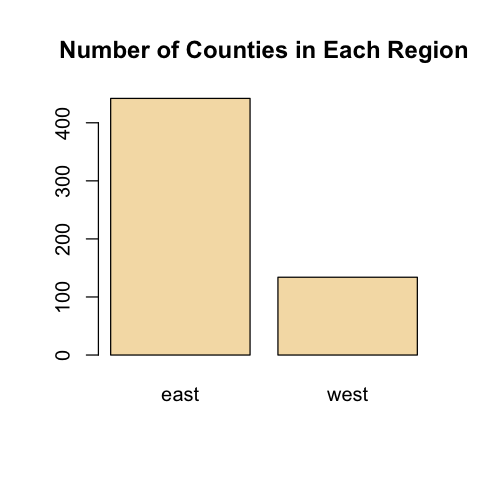

In [13]:
# Ta dùng thông số main để gán tiêu đề cho biểu đồ barplot.
barplot(reg, col = "wheat", main = "Number of Counties in Each Region")

Trên đây là một vài ví dụ về biểu đồ tổng hợp thông tin trên một chiều dữ liệu. Ta có thể đưa nhiều chiều dữ liệu hơn vào biểu đồ của chúng ta. Dưới đây, ta sẽ đưa thêm thông tin region vào biểu đồ boxplot của chúng ta.


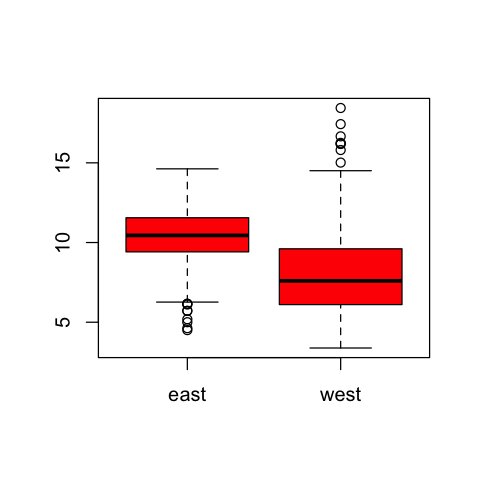

In [14]:
boxplot(pm25 ~ region, data = pollution, col = "red")

# subplot

Tương tự, ta có thể xuất nhiều histogram trên cùng một biểu đồ bằng cách kết hợp các lệnh biểu đồ lại với nhau. Đầu tiên, ta cần xác định layout cho biểu đồ bằng lệnh par().


In [15]:
# ta lấy tập con của pollution có region là east
east <- subset(pollution,region=="east")
head(east)

pm25,fips,region,longitude,latitude
9.771185,01003,east,-87.74826,30.59278
9.993817,01027,east,-85.84286,33.26581
10.688618,01033,east,-87.72596,34.73148
11.337424,01049,east,-85.79892,34.45913
12.119764,01055,east,-86.03212,34.01860
10.827805,01069,east,-85.35039,31.18973


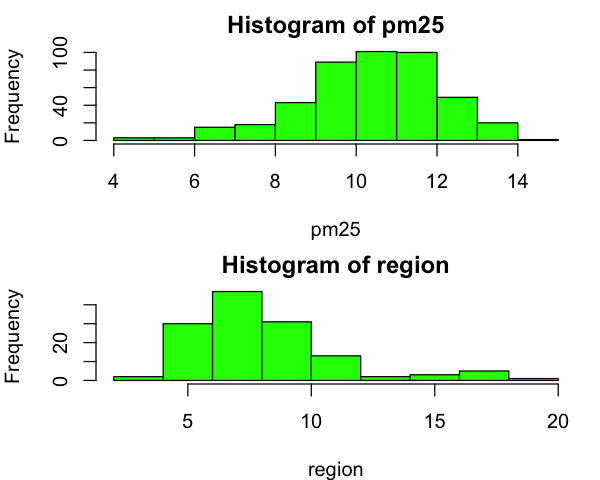

In [16]:
options(repr.plot.width=5, repr.plot.height=4)

# layout 2 cửa sổ trên cùng một cột, và thông số biên cạnh dưới, trái, trên, phải.
par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))

# hiển thị hai biểu đồ histogram trên cùng một biểu đồ
hist(east$pm25, col = "green", main="Histogram of pm25", xlab="pm25")
hist(subset(pollution,region=="west")$pm25, col = "green", main="Histogram of region", xlab="region")

# scatter plot

Scatter plots là biểu đồ hai chiều biểu diễn mối quan hệ giữa hai thuộc tính, thường là giữa x và y. Ta sẽ dùng scatterplot để biểu diễn mối quan hệ giữa latitude và pm25. Ta dùng hàm plot() như sau:


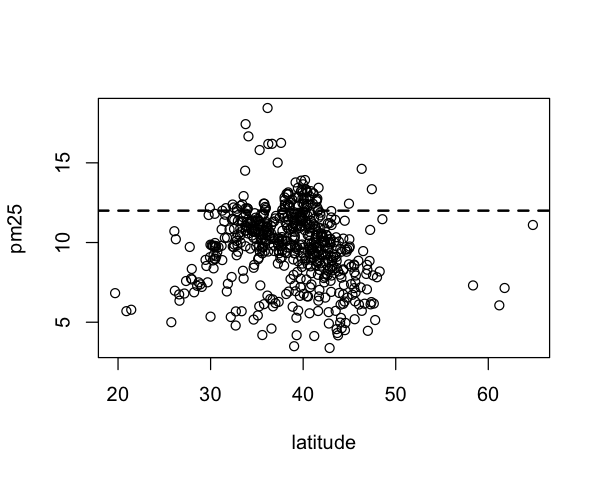

In [17]:
# sử dụng hàm with() để không cần nhập pollution$lattitude và pollution$pm25
with(pollution, plot(latitude, pm25))
# xác định giá trị chuẩn là 12 bằng đường kẻ ngang kiểu gạch nối
abline(h = 12, lwd = 2, lty = 2)

Biểu đồ trên không phân biệt được các chấm điểm thuộc region nào. Ta sẽ thêm thông tin màu cho các chấm điểm trên dựa vào thuộc tính region.


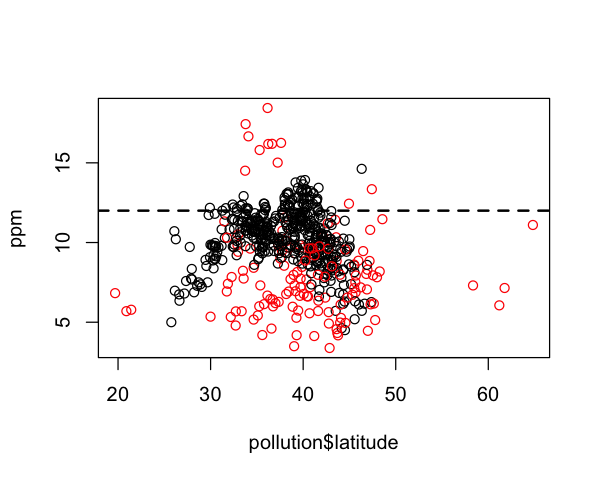

In [18]:
plot(pollution$latitude, ppm, col = pollution$region)
abline(h = 12, lwd = 2, lty = 2)

Ta có hai màu phân biệt các hạt ở phía đông và tây. Tuy nhiên, đố bạn xác định được đâu là đông, đâu là tây? Latitude thể hiện giá trị vĩ độ (đường nối bắc nam). Các giá trị ở phía bắc (lớn hơn 50) và phía nam (nhỏ hơn 25) đều có màu đỏ. Do US chỉ có vùng miền tây phủ được giá trị cực bắc và cực nam này, nên màu đỏ thể hiện vùng miền tây.

Qua biểu đồ trên ta thấy có nhiều hạt ở US vượt quá mức chuẩn cho phép của EPA, nhưng ta khó xác định được các hạt ở vùng nào có tình trạng xấu hơn, đông hay tây. Ta sẽ scatterplot cho cả hai vùng.


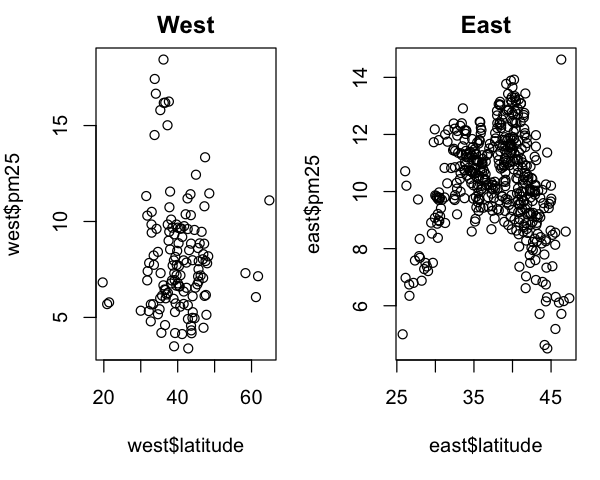

In [19]:
# xác định layout để scatterplot hai miền đông tây
par(mfrow = c(1, 2), mar = c(5, 4, 2, 1))
# scatter plot miền tây
west <- subset(pollution,region=="west")
plot(west$latitude, west$pm25, main = "West")

# scatter plot miền đông
east <- subset(pollution,region=="east")
plot(east$latitude, east$pm25, main = "East")

Ta thấy mức độ ô nhiễm xuất hiện nhiều ở miền đông, nhưng ở miền tây có các hạt mà mức độ ô nhiễm trên 15.

Như vậy ta đã tìm hiểu về exploratory graphs và các tính chất của nó. Đây là một công cụ giúp ta quan sát nhanh chóng tập dữ liệu trước khi bắt đầu tiến hành các bước xây dựng mô hình dự đoán.

<strong>Nguồn tham khảo:</strong> <a href="http://swirlstats.com/" target="_blank" rel="noopener">http://swirlstats.com/</a>